In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from config import config

In [3]:
from utils import visualize_X_samples_grid

import os
import numpy as np

os.chdir(config.dirs.project_root)

# Check Data Module

In [4]:
from src import SpriteDataModule
dm = SpriteDataModule()
dm.setup(stage='fit')

dl = dm.train_dataloader()

INFO     | setup | Loading Sprites
INFO     | setup | Loading Sprite Labels
INFO     | setup | Unique labels in training set: [0 1 2 3 4]
INFO     | setup | Counts of each class in training set: {0: 30, 1: 146, 2: 25, 3: 161, 4: 38}
INFO     | setup | Unique labels in validation set: [0 1 2 3 4]
INFO     | setup | Counts of each class in validation set: {0: 8, 1: 37, 2: 6, 3: 40, 4: 9}
INFO     | setup | Train Dataset       : 400 samples
INFO     | setup | Validation Dataset  : 100 samples


In [5]:
batch = next(iter(dl))
images, labels = batch
images.shape, labels.shape

(torch.Size([4, 3, 16, 16]), torch.Size([4]))

In [6]:
print(images.min(), images.max())

tensor(-1.) tensor(1.)


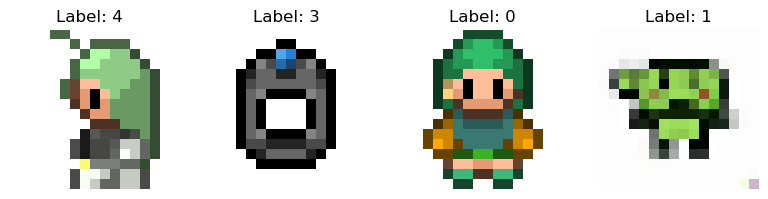

In [7]:
visualize_X_samples_grid(images, labels, n_samples=4, n_cols=4)

# Model

In [8]:
from src import SpriteLightning
light = SpriteLightning()

INFO     | __init__ | Number of Trainable Parameters : 15730691


In [17]:
noise_pred = light.forward_shapes(batch)
noise_pred.shape

DEBUG    | forward_shapes | noisy_images.shape : torch.Size([4, 3, 16, 16])
DEBUG    | forward_shapes | labels.shape : torch.Size([4])
DEBUG    | forward_shapes | class_cond.shape : torch.Size([4, 10])
DEBUG    | forward_shapes | class_cond.shape : torch.Size([4, 10, 16, 16])
DEBUG    | forward_shapes | total_input.shape : torch.Size([4, 13, 16, 16])
DEBUG    | forward_shapes | out.shape : torch.Size([4, 3, 16, 16])


torch.Size([4, 3, 16, 16])

# Generate

In [10]:
samples, labels = light.generate()
samples.shape, labels.shape

Generating images from noise: 25it [00:04,  5.02it/s]


(torch.Size([10, 3, 32, 32]), torch.Size([10]))

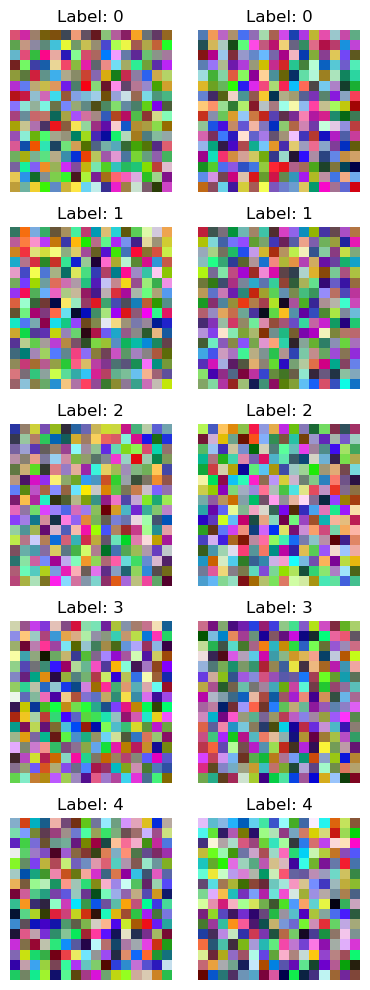

In [11]:
num_classes = 5
num_member_per_class = config.test.batch_size

visualize_X_samples_grid(
    samples, 
    labels, 
    n_samples=num_member_per_class * num_classes, 
    n_cols=num_member_per_class
)

# Test Images

In [12]:
idx = 11
images = np.load(f'./output/test_images/samples_{idx}.npy')
# images = np.load(f'./output/test_images/pred_original_sample{idx}.npy')
labels = np.load(f'./output/test_images/labels_{idx}.npy')
print(images.shape, labels.shape)

num_classes = 5
num_member_per_class = config.test.batch_size

visualize_X_samples_grid(
    images, 
    labels, 
    n_samples=num_member_per_class * num_classes, 
    n_cols=num_member_per_class
)

FileNotFoundError: [Errno 2] No such file or directory: './output/test_images/samples_11.npy'